In [3]:
!ls

a.1.eda.ipynb                   test_regression_data.ipynb
my_playlist.py                  top_500_artists_deduplicate.csv


In [4]:
!pwd

/Users/ashish1610dhiman/data_projects/fall22_hw/isye6414_hw/project


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

### Read data

In [7]:
df_org = pd.read_csv("top_500_artists_deduplicate.csv")
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4576 entries, 0 to 4575
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              4576 non-null   object 
 1   album             4576 non-null   object 
 2   artist            4576 non-null   object 
 3   release_date      4576 non-null   object 
 4   length            4576 non-null   int64  
 5   popularity        4576 non-null   int64  
 6   danceability      4576 non-null   float64
 7   acousticness      4576 non-null   float64
 8   energy            4576 non-null   float64
 9   instrumentalness  4576 non-null   float64
 10  liveness          4576 non-null   float64
 11  loudness          4576 non-null   float64
 12  speechiness       4576 non-null   float64
 13  tempo             4576 non-null   float64
 14  time_signature    4576 non-null   int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 536.4+ KB


In [8]:
df_org.count()

name                4576
album               4576
artist              4576
release_date        4576
length              4576
popularity          4576
danceability        4576
acousticness        4576
energy              4576
instrumentalness    4576
liveness            4576
loudness            4576
speechiness         4576
tempo               4576
time_signature      4576
dtype: int64

In [9]:
df_org.nunique()

name                4451
album               2927
artist               729
release_date        1531
length              4245
popularity            66
danceability         721
acousticness        1953
energy               807
instrumentalness    1612
liveness            1069
loudness            3515
speechiness         1034
tempo               4214
time_signature         4
dtype: int64

In [10]:
df_org.describe()

,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
count,4576.000000,4576.000000,4576.000000,4576.000000,4576.000000,4576.000000,4576.000000,4576.000000,4576.000000,4576.000000,4576.000000
mean,217789.556818,71.409309,0.640186,0.231522,0.658574,0.021347,0.187372,-6.491035,0.097575,121.737096,3.950393
std,56337.555708,8.199005,0.152407,0.253239,0.186724,0.110489,0.154929,3.059317,0.104104,28.746520,0.306483
min,69900.000000,14.000000,0.079300,0.000005,0.002290,0.000000,0.015700,-39.627000,0.023200,42.741000,1.000000
25%,181896.750000,66.000000,0.544000,0.030575,0.539750,0.000000,0.094875,-7.704250,0.037200,99.410500,4.000000
50%,210307.500000,72.000000,0.657000,0.127000,0.682000,0.000000,0.124000,-5.898500,0.055200,120.055500,4.000000
75%,242030.000000,77.000000,0.750250,0.367250,0.800000,0.000102,0.232000,-4.521000,0.110000,140.004500,4.000000
max,811077.000000,100.000000,0.970000,0.995000,0.996000,0.982000,0.977000,0.175000,0.961000,220.099000,5.000000


### Who are the duplicated names

In [13]:
df_org["name"].duplicated().sum()

125

In [14]:
4451+125

4576

In [16]:
df_org[df_org["name"].duplicated()]

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
323,Perfect,Made In The A.M. (Deluxe Edition),One Direction,2015-11-13,230333,79,0.647,0.0598,0.823,0.000000,0.1190,-5.231,0.0762,99.933,4
385,Without Me,Manic,Halsey,2020-01-17,201660,80,0.752,0.2970,0.488,0.000009,0.0936,-7.050,0.0705,136.041,4
451,Happier,Happier,Marshmello,2018-08-17,214289,84,0.687,0.1910,0.792,0.000000,0.1670,-2.749,0.0452,100.015,4
466,Numb,Meteora,Linkin Park,2003-03-24,185586,84,0.496,0.0046,0.863,0.000000,0.6390,-4.153,0.0381,110.018,4
614,West Coast,West Coast,OneRepublic,2022-02-25,192947,77,0.685,0.3170,0.699,0.000000,0.0895,-7.803,0.0349,134.057,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4497,Forever,Beautiful Mind,Rod Wave,2022-08-12,214185,69,0.626,0.5660,0.524,0.000011,0.1030,-8.987,0.0411,129.996,4
4527,HOT,SEVENTEEN 4th Album 'Face the Sun',SEVENTEEN,2022-05-27,197586,81,0.765,0.0539,0.777,0.000003,0.3380,-4.376,0.0399,111.944,4
4537,September,"The Best Of Earth, Wind & Fire Vol. 1","Earth, Wind & Fire",1978-11-23,215093,84,0.697,0.1680,0.832,0.001310,0.2690,-7.264,0.0298,125.926,4
4544,Fantasy,All 'N All,"Earth, Wind & Fire",1977-11-21,277413,59,0.608,0.3230,0.745,0.004280,0.1350,-8.772,0.0857,88.941,4


**==> Two songs by diff artists can have same name**\
ID of data = name,artist

### Create ID

In [18]:
df_org[["name","artist"]].duplicated().sum()

8

In [23]:
df_org[df_org[["name","artist"]].duplicated(keep = False)].sort_values(by=["name","artist"])

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
3583,679 (feat. Remy Boyz),679 (feat. Remy Boyz),Fetty Wap,2015-06-29,196693,75,0.618,0.00256,0.717,0.000000,0.6250,-5.738,0.3180,190.050,4
3592,679 (feat. Remy Boyz),679 (feat. Remy Boyz),Fetty Wap,2015-06-29,196184,54,0.577,0.00411,0.833,0.000000,0.0709,-2.888,0.3430,189.723,4
2612,Algo Me Gusta De Ti,Líderes,Wisin & Yandel,2012-01-01,274946,76,0.627,0.00291,0.768,0.000000,0.0598,-5.296,0.0325,127.953,4
2613,Algo Me Gusta De Ti,Líderes,Wisin & Yandel,2012-01-01,275213,76,0.716,0.02430,0.785,0.000000,0.0638,-3.926,0.0534,127.957,4
1593,DÁKITI,DÁKITI,Bad Bunny,2020-10-30,205090,83,0.731,0.40100,0.573,0.000052,0.1130,-10.059,0.0544,109.928,4
2332,DÁKITI,EL ÚLTIMO TOUR DEL MUNDO,Bad Bunny,2020-11-27,205090,81,0.731,0.40100,0.573,0.000052,0.1130,-10.059,0.0544,109.928,4
1251,How Will I Know,How Will I Know,Whitney Houston,2021-09-24,213435,75,0.761,0.17800,0.739,0.000003,0.2300,-3.591,0.0369,118.997,4
2360,How Will I Know,Whitney Houston,Whitney Houston,1985-02-14,275533,71,0.832,0.20100,0.544,0.000139,0.6320,-12.697,0.0442,119.490,4
2657,Isn't She Lovely,The Definitive Collection,Stevie Wonder,2002-10-29,199386,68,0.747,0.20200,0.692,0.000034,0.0698,-8.956,0.0474,118.698,4
2658,Isn't She Lovely,Songs In The Key Of Life,Stevie Wonder,1976-09-28,394266,67,0.481,0.18200,0.826,0.003520,0.3240,-6.974,0.0851,118.679,4


### Distribution of popularity

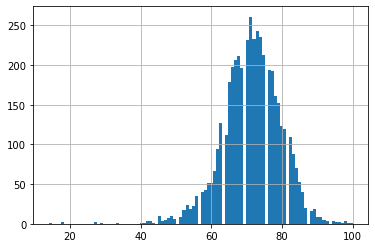

In [28]:
df_org["popularity"].hist(bins = 100)

In [33]:
df_org[["popularity"]].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

,popularity
0.1,62.0
0.2,65.0
0.3,68.0
0.4,70.0
0.5,72.0
0.6,74.0
0.7,76.0
0.8,78.0
0.9,81.0
1.0,100.0


#### Average popularity of artist

In [52]:
arist_grp = df_org.groupby(["artist"]).agg({"popularity":"mean"})
arist_grp.describe()

,popularity
count,729.000000
mean,70.993666
std,6.511053
min,29.000000
25%,67.400000
50%,71.250000
75%,75.200000
max,92.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f93626ab460>]],
      dtype=object)

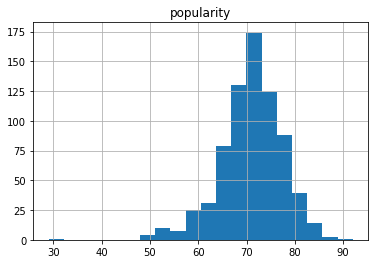

In [53]:
arist_grp.hist(bins=20)

In [54]:
arist_grp.quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

,popularity
0.1,63.080000
0.2,66.320000
0.3,68.146667
0.4,70.000000
0.5,71.250000
0.6,72.852381
0.7,74.390000
0.8,76.050000
0.9,78.607273
1.0,92.000000


In [55]:
arist_grp.columns

Index(['popularity'], dtype='object')

In [56]:
arist_grp["popularity"]

artist
$NOT                 64.000000
$uicideboy$          78.300000
2 Chainz             65.600000
21 Savage            77.454545
220 KID              68.000000
                       ...    
benny blanco         68.750000
blackbear            75.333333
blink-182            74.300000
salem ilese          77.000000
sped up nightcore    75.000000
Name: popularity, Length: 729, dtype: float64

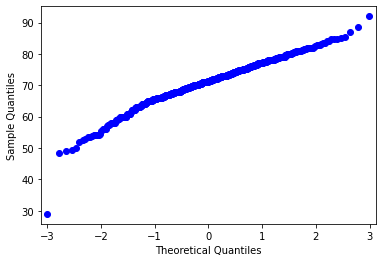

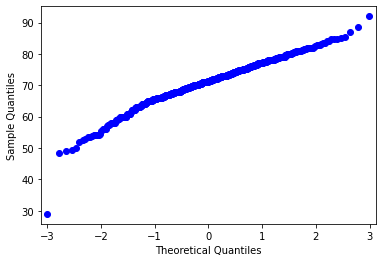

In [57]:
x = arist_grp["popularity"]
sm.qqplot(x)

In [58]:
arist_grp["artist_buckets"] = np.where(arist_grp["popularity"]<=60,"a.<=60",\
                                       np.where(arist_grp["popularity"]<=70,"b.<=70",\
                                               np.where(arist_grp["popularity"]<=75,"c.<=75",\
                                                        np.where(arist_grp["popularity"]<=80,"d.<=80","e.>80"))))

In [79]:
arist_grp.groupby(["artist_buckets"]).count()

,popularity
artist_buckets,
a.<=60,46
b.<=70,258
c.<=75,237
d.<=80,144
e.>80,44


In [60]:
joined = df_org.merge(arist_grp.reset_index(),left_on= ["artist"],\
                      right_on=["artist"],how="left",suffixes=("","_artist"))
joined.count()

name                 4576
album                4576
artist               4576
release_date         4576
length               4576
popularity           4576
danceability         4576
acousticness         4576
energy               4576
instrumentalness     4576
liveness             4576
loudness             4576
speechiness          4576
tempo                4576
time_signature       4576
popularity_artist    4576
artist_buckets       4576
dtype: int64

### Tukey with Artist Buckets 

In [77]:
def ad_tukey(grp="",reponse=""): 
    tukey = pairwise_tukeyhsd(endog=joined[response],
                          groups=joined[grp],alpha=0.01)
    sns.boxplot(data=joined, x=response, y=grp)
    plt.show()
    print (tukey)

Group Variable: artist_buckets, Response Variable: danceability


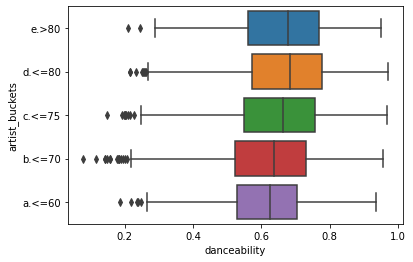

Multiple Comparison of Means - Tukey HSD, FWER=0.01
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
a.<=60 b.<=70   0.0157 0.5759 -0.0193 0.0508  False
a.<=60 c.<=75   0.0428  0.001  0.0077  0.078   True
a.<=60 d.<=80   0.0593  0.001  0.0229 0.0958   True
a.<=60  e.>80   0.0547  0.001  0.0117 0.0977   True
b.<=70 c.<=75   0.0271  0.001  0.0094 0.0448   True
b.<=70 d.<=80   0.0436  0.001  0.0233 0.0638   True
b.<=70  e.>80    0.039  0.001  0.0084 0.0695   True
c.<=75 d.<=80   0.0165 0.0646 -0.0039 0.0369  False
c.<=75  e.>80   0.0119 0.6893 -0.0188 0.0425  False
d.<=80  e.>80  -0.0046    0.9 -0.0367 0.0275  False
---------------------------------------------------

Group Variable: artist_buckets, Response Variable: energy


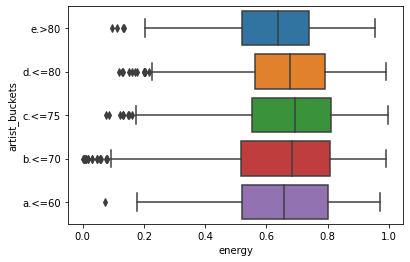

Multiple Comparison of Means - Tukey HSD, FWER=0.01 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
a.<=60 b.<=70  -0.0041    0.9 -0.0473   0.039  False
a.<=60 c.<=75   0.0207 0.5205 -0.0225  0.0639  False
a.<=60 d.<=80   0.0172 0.6963 -0.0276  0.0621  False
a.<=60  e.>80   -0.035 0.1982 -0.0879   0.018  False
b.<=70 c.<=75   0.0248  0.002   0.003  0.0467   True
b.<=70 d.<=80   0.0213 0.0418 -0.0035  0.0462  False
b.<=70  e.>80  -0.0309  0.058 -0.0684  0.0067  False
c.<=75 d.<=80  -0.0035    0.9 -0.0286  0.0216  False
c.<=75  e.>80  -0.0557  0.001 -0.0934  -0.018   True
d.<=80  e.>80  -0.0522  0.001 -0.0917 -0.0127   True
----------------------------------------------------

Group Variable: artist_buckets, Response Variable: tempo


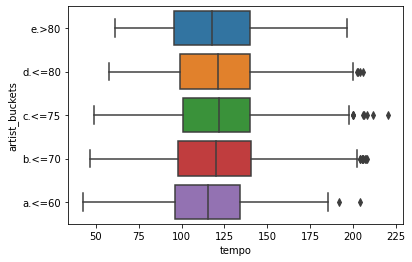

Multiple Comparison of Means - Tukey HSD, FWER=0.01 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
a.<=60 b.<=70   4.1971 0.2408 -2.4598 10.8541  False
a.<=60 c.<=75    5.448 0.0605 -1.2247 12.1207  False
a.<=60 d.<=80   4.5754 0.1983 -2.3477 11.4985  False
a.<=60  e.>80   2.7635 0.7805 -5.4099 10.9369  False
b.<=70 c.<=75   1.2509 0.7193  -2.119  4.6208  False
b.<=70 d.<=80   0.3783    0.9 -3.4637  4.2203  False
b.<=70  e.>80  -1.4337    0.9 -7.2333   4.366  False
c.<=75 d.<=80  -0.8726    0.9 -4.7418  2.9966  False
c.<=75  e.>80  -2.6846 0.5525 -8.5023  3.1332  False
d.<=80  e.>80  -1.8119 0.8566 -7.9153  4.2914  False
----------------------------------------------------

Group Variable: artist_buckets, Response Variable: instrumentalness


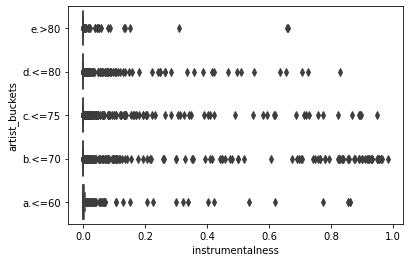

Multiple Comparison of Means - Tukey HSD, FWER=0.01 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
a.<=60 b.<=70  -0.0048    0.9 -0.0303  0.0207  False
a.<=60 c.<=75  -0.0213 0.0532 -0.0468  0.0043  False
a.<=60 d.<=80  -0.0235 0.0324   -0.05  0.0031  False
a.<=60  e.>80  -0.0285 0.0259 -0.0598  0.0029  False
b.<=70 c.<=75  -0.0165  0.001 -0.0294 -0.0035   True
b.<=70 d.<=80  -0.0187  0.001 -0.0334  -0.004   True
b.<=70  e.>80  -0.0237 0.0049 -0.0459 -0.0014   True
c.<=75 d.<=80  -0.0022    0.9 -0.0171  0.0126  False
c.<=75  e.>80  -0.0072 0.8086 -0.0295  0.0151  False
d.<=80  e.>80   -0.005    0.9 -0.0284  0.0184  False
----------------------------------------------------

Group Variable: artist_buckets, Response Variable: energy


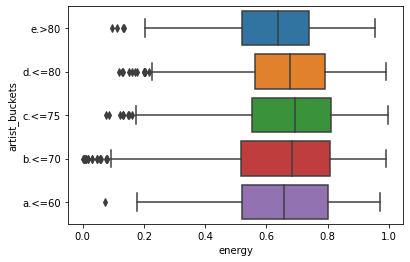

Multiple Comparison of Means - Tukey HSD, FWER=0.01 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
a.<=60 b.<=70  -0.0041    0.9 -0.0473   0.039  False
a.<=60 c.<=75   0.0207 0.5205 -0.0225  0.0639  False
a.<=60 d.<=80   0.0172 0.6963 -0.0276  0.0621  False
a.<=60  e.>80   -0.035 0.1982 -0.0879   0.018  False
b.<=70 c.<=75   0.0248  0.002   0.003  0.0467   True
b.<=70 d.<=80   0.0213 0.0418 -0.0035  0.0462  False
b.<=70  e.>80  -0.0309  0.058 -0.0684  0.0067  False
c.<=75 d.<=80  -0.0035    0.9 -0.0286  0.0216  False
c.<=75  e.>80  -0.0557  0.001 -0.0934  -0.018   True
d.<=80  e.>80  -0.0522  0.001 -0.0917 -0.0127   True
----------------------------------------------------

Group Variable: artist_buckets, Response Variable: acousticness


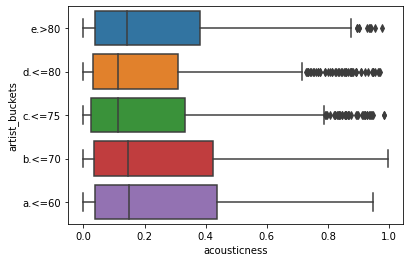

Multiple Comparison of Means - Tukey HSD, FWER=0.01 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
a.<=60 b.<=70   0.0057    0.9 -0.0528  0.0641  False
a.<=60 c.<=75  -0.0432 0.1144 -0.1018  0.0153  False
a.<=60 d.<=80  -0.0508 0.0505 -0.1116  0.0099  False
a.<=60  e.>80  -0.0061    0.9 -0.0778  0.0656  False
b.<=70 c.<=75  -0.0489  0.001 -0.0784 -0.0193   True
b.<=70 d.<=80  -0.0565  0.001 -0.0902 -0.0228   True
b.<=70  e.>80  -0.0117    0.9 -0.0626  0.0392  False
c.<=75 d.<=80  -0.0076    0.9 -0.0416  0.0263  False
c.<=75  e.>80   0.0372 0.1239 -0.0139  0.0882  False
d.<=80  e.>80   0.0448 0.0509 -0.0088  0.0983  False
----------------------------------------------------



In [78]:
grp = "artist_buckets"
for response in ["danceability","energy", "tempo", "instrumentalness", "energy", "acousticness"]:
    print (f"Group Variable: {grp}, Response Variable: {response}")
    ad_tukey(grp,response)
    print()

### Spatial Analysis of Artists